In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
%matplotlib inline

In [2]:
# Ticker Input
stock_ticker = 'FB'

In [3]:
tickerdata = yf.Ticker(stock_ticker)

In [4]:
ticker_df = tickerdata.history(period = '1d', start= '2016-1-1')

In [5]:
ticker_df = ticker_df[['Close']]

In [6]:
ticker_df.isna().sum()

Close    0
dtype: int64

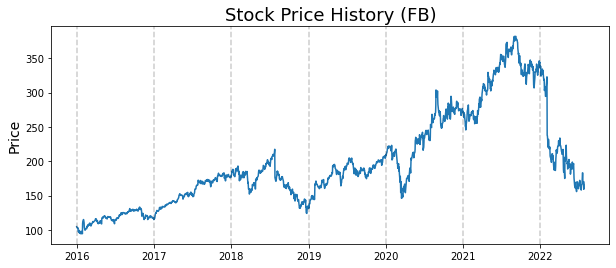

In [7]:
plt.figure(figsize = (10,4))
plt.plot(ticker_df.Close)
plt.title('Stock Price History (%s)' %stock_ticker, fontsize = 18)
plt.ylabel('Price' ,fontsize = 14)
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color = 'k', linestyle= '--', alpha = 0.2)

In [8]:
#log returns
Log_returns = np.log(1+ ticker_df['Close'].pct_change())
print (Log_returns)

Date
2015-12-31         NaN
2016-01-04   -0.023590
2016-01-05    0.004977
2016-01-06    0.002333
2016-01-07   -0.050287
                ...   
2022-07-21    0.000437
2022-07-22   -0.078920
2022-07-25   -0.015599
2022-07-26   -0.046049
2022-07-27    0.063478
Name: Close, Length: 1654, dtype: float64


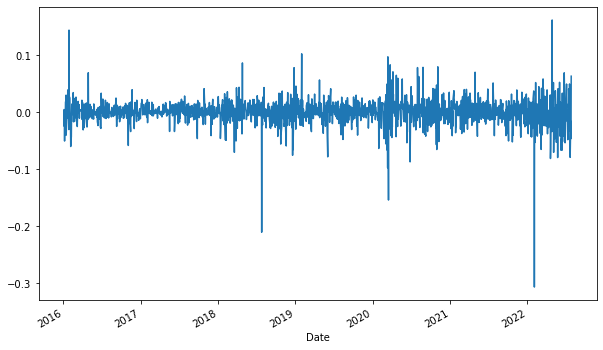

In [9]:
Log_returns.plot(figsize = (10,6));
plt.show()

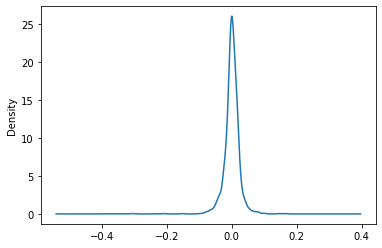

In [10]:
Log_returns.plot.density()
plt.show()

In [11]:
mean = Log_returns.mean()
variance = Log_returns.var()
STD = Log_returns.std()

mean= pd.Series(mean)
variance = pd.Series(variance)
STD = pd.Series(STD)

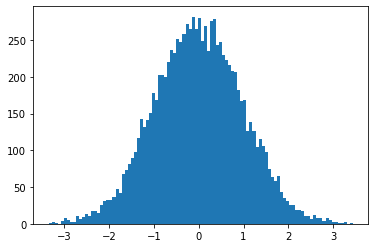

In [12]:
random_numbers = np.random.rand(10000)
normal_random_numbers = norm.ppf(random_numbers)
plt.hist(normal_random_numbers,bins = 100);

In [13]:
t_intervals = 250 
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_simplereturns_simulated.shape

(250, 10000)

In [14]:
last_price = ticker_df.iloc[-1]

price_list = np.zeros_like(daily_simplereturns_simulated)

price_list[0] = last_price

price_list

array([[169.58000183, 169.58000183, 169.58000183, ..., 169.58000183,
        169.58000183, 169.58000183],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

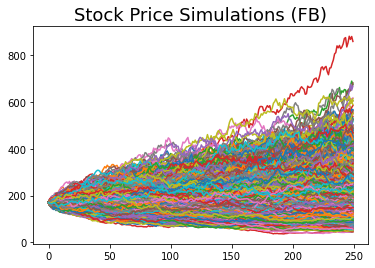

In [15]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_simplereturns_simulated[t]

plt.plot(price_list);
plt.title('Stock Price Simulations (%s)' %stock_ticker, fontsize = 18);


In [16]:
drift = mean - (0.5*variance)

t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_withdrift = daily_logreturns_simulated +drift.values
daily_simplereturns_simulated_withdrift = np.exp(daily_logreturns_simulated_withdrift)

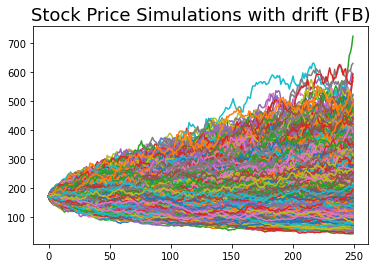

In [17]:
last_price = ticker_df.iloc[-1]
price_list = np.zeros_like(daily_simplereturns_simulated_withdrift)
price_list[0] = last_price

for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_simplereturns_simulated_withdrift[t]

plt.plot(price_list);
plt.title('Stock Price Simulations with drift (%s)' %stock_ticker, fontsize = 18);

In [18]:
WorstSim = round(price_list[-1].min(),2)
AvgSim = round(price_list[-1].mean(),2)
BestSim = round(price_list[-1].max(),2)

print("Best and Worst Cases")
print(f"Worst Simulation $/share: {WorstSim}")
print(f"Avg Simulation $/share: {AvgSim}")
print(f"Best Simulation $/share: {BestSim}")

Mean_Day250Prices = price_list[-1].mean()
SD_Day250Prices = price_list[-1].std()
UpperInterval_1SD = Mean_Day250Prices + 1 * SD_Day250Prices 
LowerInterval_1SD = Mean_Day250Prices - 1 * SD_Day250Prices
UpperInterval_2SD = Mean_Day250Prices + 2 * SD_Day250Prices
LowerInterval_2SD = Mean_Day250Prices - 2 * SD_Day250Prices

print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: ${LowerInterval_1SD} and ${round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: ${round(LowerInterval_2SD,2)} and ${round(UpperInterval_2SD,2)}")

Best and Worst Cases
Worst Simulation $/share: 40.94
Avg Simulation $/share: 183.38
Best Simulation $/share: 724.51

Confidence Intervals
1 Sigma (1 S.D): 68% confident that price after 250 days will fall between: $113.07093975782017 and $253.69
2 Sigma (2 S.D): 95% confident that price after 250 days will fall between: $42.76 and $323.99
